# Week 5 — Exploratory Data Analysis (EDA) & Visualization

**Goals**
- Clean and explore data with Pandas
- Describe distributions and relationships
- Build visualizations with Matplotlib/Seaborn/Plotly

## 0) Setup

In [1]:
# !pip -q install pandas numpy matplotlib seaborn plotly
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px
pd.options.display.float_format = '{:,.2f}'.format
print("pandas:", pd.__version__)

Matplotlib is building the font cache; this may take a moment.


pandas: 2.3.3


## 1) Load a sample dataset (Titanic-like synthetic)

In [2]:
import io
csv = io.StringIO('''Survived,Pclass,Sex,Age,Fare
0,3,male,22,7.25
1,1,female,38,71.28
1,3,female,26,7.92
1,1,female,35,53.10
0,3,male,35,8.05
0,3,male,28,8.46
0,1,male,54,51.86
1,3,female,2,21.07
1,3,female,27,11.13
0,2,male,14,30.07
''')
df = pd.read_csv(csv)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22,7.25
1,1,1,female,38,71.28
2,1,3,female,26,7.92
3,1,1,female,35,53.10
4,0,3,male,35,8.05


## 2) Clean & describe

In [3]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
df['Sex'] = df['Sex'].astype('category')
df.describe(include='all')

,Survived,Pclass,Sex,Age,Fare
count,10.00,10.00,10,10.00,10.00
unique,NaN,NaN,2,NaN,NaN
top,NaN,NaN,female,NaN,NaN
freq,NaN,NaN,5,NaN,NaN
mean,0.50,2.30,NaN,28.10,27.02
std,0.53,0.95,NaN,14.09,23.60
min,0.00,1.00,NaN,2.00,7.25
25%,0.00,1.25,NaN,23.00,8.15
50%,0.50,3.00,NaN,27.50,16.10
75%,1.00,3.00,NaN,35.00,46.41


## 3) Visualizations (Matplotlib/Seaborn)

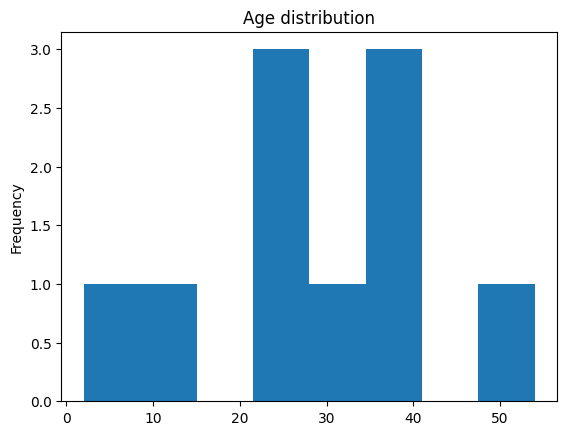

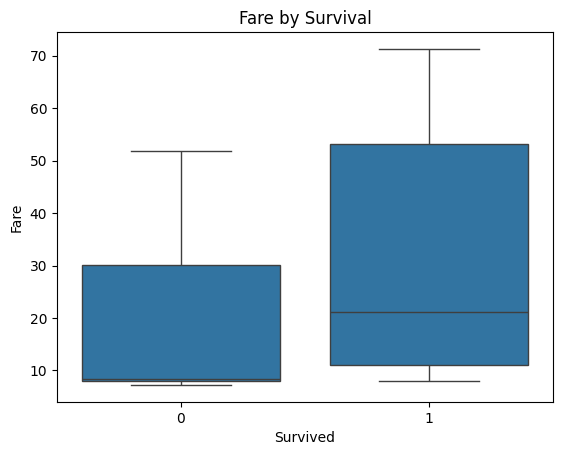

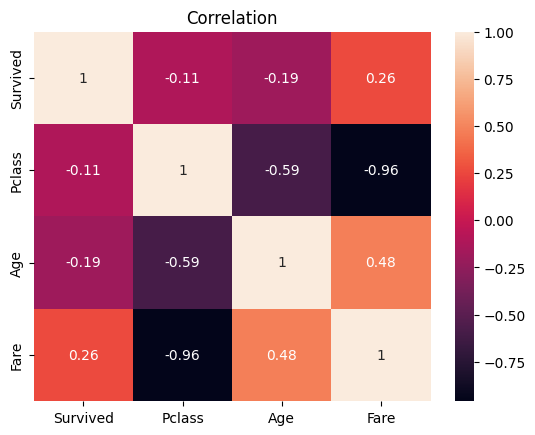

In [4]:
plt.figure()
df['Age'].plot(kind='hist', bins=8, title='Age distribution'); plt.show()

plt.figure()
sns.boxplot(x='Survived', y='Fare', data=df); plt.title('Fare by Survival'); plt.show()

plt.figure()
sns.heatmap(df[['Survived','Pclass','Age','Fare']].corr(), annot=True); plt.title('Correlation'); plt.show()

## 4) Interactive Plotly

In [5]:
fig = px.scatter(df, x='Age', y='Fare', color='Sex', symbol='Survived', title='Age vs Fare')
fig.show()

## 5) Mini-project tasks

- Compute survival rate by `Sex` and `Pclass` (groupby).
- Create a violin plot of `Age` by `Survived`.
- Build a 2x2 subplot dashboard with histograms for `Age` and `Fare` split by `Sex`.